Initial estimate: maode = not knowb
0th estimate: mode = 0.64
1th estimate: mode = 0.69
2th estimate: mode = 0.65


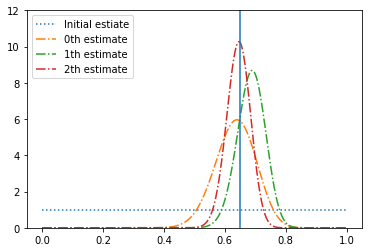

In [1]:
#베르누이분포의 모수 추정
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt


mu0 = 0.65
a,b= 1,1
print("Initial estimate: maode = not knowb")

xx= np.linspace(0,1,1000)
plt.plot(xx, sp.stats.beta(a,b).pdf(xx),ls = ":", label = "Initial estiate")

np.random.seed(0)

for i in range(3):
  x= sp.stats.bernoulli(mu0).rvs(50)
  N0,N1 = np.bincount(x, minlength = 2)
  a,b, = a + N1, b+N0
  plt.plot(xx, sp.stats.beta(a,b).pdf(xx),ls="-.", label = "{}th estimate".format(i))
  print("{}th estimate: mode = {:4.2f}".format(i, (a-1)/(a+b-2)))

plt.vlines(x= 0.65, ymin = 0, ymax = 12)
plt.ylim(0,12)
plt.legend()
plt.show()

0th esrimate: 1.98
1th esrimate: 2.07
2th esrimate: 2.05
3th esrimate: 2.03


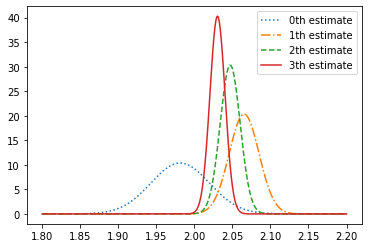

In [2]:
#정규분포의 기댓값 모수 추정 
mu, sigma2 = 2,4
mu0,sigma20=0,1
xx= np.linspace(1.8,2.2,1000)
np.random.seed(1)
N=100
ls = [":","-.","--","-"]
for i in range(4):
  x = sp.stats.norm(mu).rvs(N)
  mu0 = sigma2/(N*sigma20 + sigma2)* mu0 + (N*sigma20)/(N*sigma20+ sigma2)*x.mean()
  sigma20 = 1/(1/sigma20+N/sigma2)
  plt.plot(xx, sp.stats.norm(mu0,sigma20).pdf(xx), ls=ls[i], label = "{}th estimate".format(i))
  print("{}th esrimate: {:4.2f}".format(i,mu0))
plt.legend()
plt.show()

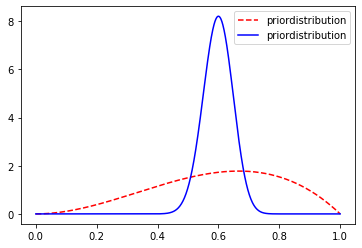

In [3]:
xx= np.linspace(0,1,1000)
aA,bA = 3,2
aB,bB = 61,41
plt.plot(xx,sp.stats.beta(aA,bA).pdf(xx),c= "r", ls = "--",label = "priordistribution")
plt.plot(xx,sp.stats.beta(aB,bB).pdf(xx),c= "b", ls = "-",label = "priordistribution")
plt.legend()
plt.show()
#베타 분포의 확률 밀도 함수를 그래프로 그립니다. 빨간색 선은 베타 분포의 확률 밀도 함수이고, 파란색 선은 베타 분포의 확률 밀도 함수입니다.
#두 분포는 모양이 비슷하지만, 파란색 분포가 빨간색 분포보다 값이 더 높습니다. 
#이는 aB=61, bB=41인 베타 분포가 aA=3, bA=2인 베타 분포보다 더 확률이 높다는 것을 의미합니다.

In [4]:
data = [183,168,177,170,175,177,178,166,174,178]


mu, sigma2 = np.mean(data), np.var(data)
mu0,sigma20= 165, 49

ls = [":","-.","--","-"]
for i in range(101):
  x = sp.stats.norm(mu).rvs(N)
  mu0 = sigma2/(N*sigma20 + sigma2)* mu0 + (N*sigma20)/(N*sigma20+ sigma2)*x.mean()
  sigma20 = 1/(1/sigma20+N/sigma2)
print("{}th esrimate: {:4.2f}".format(i,mu0))

100th esrimate: 174.61
